# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"

Nhóm 4:
1. 1712615 - Nguyễn Trọng Nghĩa - [GitHub](https://github.com/nguyentrongnghia142)
2. 1712683 - Phạm Hoàng Phương - [Github](https://github.com/superman19993)
3. 1712718 - Huỳnh Thanh Sang - [GitHub](https://github.com/hts7117)
4. 1712584 - Nguyễn Công Lý - [GitHub](https://github.com/conglyne222)

Link thùng chứa Github của nhóm: [Repo](https://github.com/nguyentrongnghia142/CommonLit-Readability-Prize)

## Mô tả bài toán
[Bài toán](https://www.kaggle.com/c/commonlitreadabilityprize/overview)

### Sơ bộ về bài toán
### Bối cảnh:


* Đọc là một kỹ năng cần thiết để thành công trong học tập, Khi học sinh tiếp cận được những đoạn văn với mức độ thách thức phù hợp, chúng sẽ phát triển kỹ năng đọc một cách tự nhiên.

* CommonLit là một tổ chức phi lợi nhuận phục vụ hơn 20 tr giáo viên và học sinh với các bài học đọc và viết kĩ thuật số miễn phí cho các lớp 3-12, cùng với đại học bang Georgia, một trường đại học nghiên cứu ở Atlanta, đã tổ chức 1 cuộc thi nhằm cải thiện phương pháp đánh giá khả năng đọc.

### Nội dung:


*   Trong cuộc thị này, người tham gia sẽ xây dựng các thuật toán để đánh giá mức độ phức tạp của việc đọc các đoạn văn để sử dụng trong lớp học từ lớp 3-12. Để đạt được điều này, phải kết hợp kĩ năng học máy của họ để làm việc với 1 tập dữ liệu bao gồm người đọc từ nhiều nhóm tuổi khác nhau với một số lượng lớn các văn bản thuộc nhiều lĩnh vực khác nhau.


*   Nếu thành công, bạn đã hỗ trợ các giáo viên và sinh viên, các nhà phát triền chương trình giảng dạy đọc viết có thể đánh giá nhanh chóng và chính xác các tài liệu trong lớp học của họ. Quan trọng nhất, học sinh sẽ được hưởng lợi từ việc đánh giá độ phức tạp và khả năng đọc của họ, giúp họ cải thiện các kỹ năng đọc thiết yếu dễ dàng hơn nhiều.

### Đánh giá:

-	Các bài dự thi sẽ được đánh giá dựa trên độ lỗi RMSE: 

    ![image.png](https://scontent.fdad1-1.fna.fbcdn.net/v/t1.15752-9/258845405_591261328774655_4260656527898854926_n.png?_nc_cat=109&ccb=1-5&_nc_sid=ae9488&_nc_ohc=JcFQuPsmYnYAX-OYyFs&_nc_ht=scontent.fdad1-1.fna&oh=491e243d6da6d57179a18d30529a8466&oe=61BF2150)


### Submission file:
-	Bao gồm ID và độ dễ đọc của đoạn trích:

    ![image.png](https://scontent.fdad1-2.fna.fbcdn.net/v/t1.15752-9/254632714_433915911583493_5614680366254606947_n.png?_nc_cat=102&ccb=1-5&_nc_sid=ae9488&_nc_ohc=omTcknGdud8AX8hu4Fv&_nc_ht=scontent.fdad1-2.fna&oh=9ad8860d2bb51f4ab489fecd599a056d&oe=61BECC2F)


### Dataset: 
  1. 	Id:  mã id của đoạn trích (unique)
  2.   url_legal: đường dẫn của đoạn trích- trường này có thể trống trong tập test
  3.   license: bản quyền của đoạn trích- trường này có thể trống trong tập test
  4.   excerpt: nội dung đoạn trích cần dự đoán độ dễ đọc
  5.   target: độ dễ của đoạn trích (được lấy từ nhiều lĩnh vực và được nhiều người ở các độ tuổi khác nhạu đánh giá)
  6.   standard_error: thước đo chênh lệch điểm số giữa nhiều người đánh giá cho mỗi đoạn trích. Không được bao gồm trong tập test.

## Giải quyết bài toán
[Giải pháp](https://www.kaggle.com/c/commonlitreadabilityprize/discussion/258148) - Đứng thứ 4 trong private leaderboard (🏅️ 4th Place Solution (0.447) 🏅️)

#### Lấy dữ liệu


In [4]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1_A5Y2u2XjFVfxVBr6flozZ-Gr0gKRaGm" -O commonlitreadabilityprize.zip &> /dev/null
!unzip /content/commonlitreadabilityprize.zip

Archive:  /content/commonlitreadabilityprize.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#### EDA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data_train = pd.read_csv("train.csv",index_col=0)
data_train.head(3)

,url_legal,license,excerpt,target,standard_error
id,,,,,
c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676


In [7]:
data_train = data_train.dropna(axis = 1)
data_train.shape

(2834, 3)

In [8]:
data_train.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


* Giá trị nhỏ nhất cột độ lệch chuẩn có giá trị 0. Nguyên nhân có thể là đoạn trích được ít người đánh giá. 

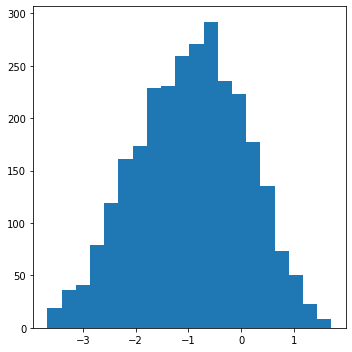

In [9]:
df = data_train
n_bins = 20
fig, axs = plt.subplots(1, figsize=(5, 5), sharey=True, tight_layout=True)

axs.hist(df.target, bins=n_bins);
# axs[1].hist(df.standard_error, bins=n_bins);

* Nhận xét :
  - Đa phần các đoạn text đều trong tập train đều ở mức độ khó.

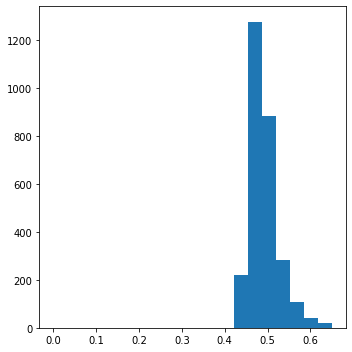

In [10]:
fig, axs = plt.subplots(1, figsize=(5, 5), sharey=True, tight_layout=True)

axs.hist(df.standard_error, bins=n_bins);

* Nhận xét: Độ lệch chuẩn của các đánh giá đa phần giao động trong khoảng 0.5

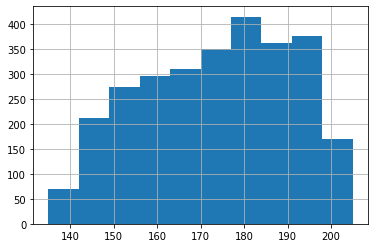

In [11]:
df["word_count"] = df['excerpt'].str.split().apply(len)
df["word_count"].hist();

* Nhận xét: Phần lớn độ dài các đoạn trích nằm trong khoảng từ 300-400.

In [37]:
 total = df['excerpt'].str.split().explode().value_counts().sum()
 stopwords = df['excerpt'].str.split().explode().value_counts().nlargest(50).sum()
 print(len(df['excerpt'].str.split().explode().unique()))
 print((stopwords / total) * 100)

54381
39.02792765043419


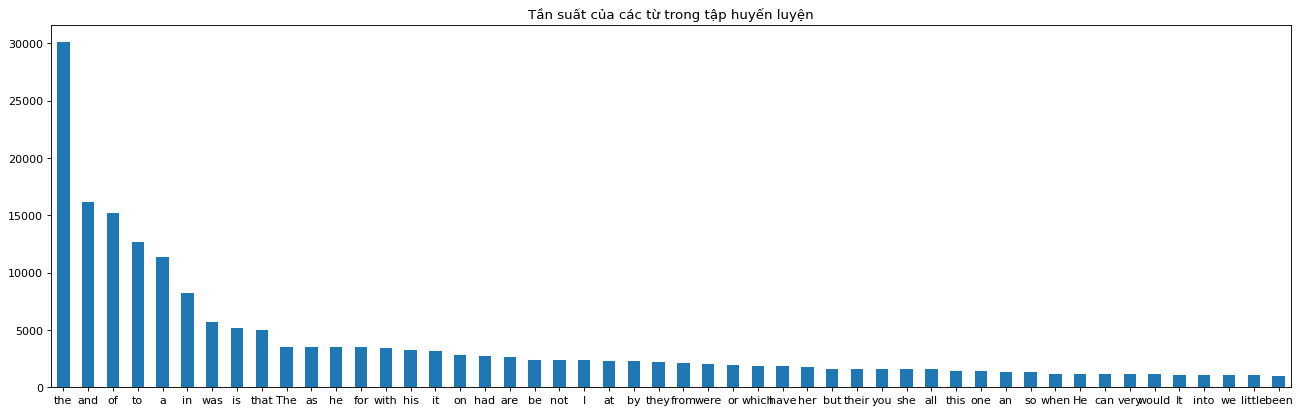

In [27]:
plt.figure(figsize = (20, 6), dpi = 80)
df['excerpt'].str.split().explode().value_counts().nlargest(50).plot.bar(rot = 0)
plt.title("Tần suất của các từ trong tập huyến luyện");

* Nhận xét: 
 - Giống như mong đợi thì các từ stopwords chiếm phần lớn từ trong dữ liệu. 
 - Stopword Chiếm khoảng 40% trong tổng số lượng từ

### Tóm tắt về giải pháp
#### Tổng quát 
* Tác giả sử dụng kỹ thuật 5 fold CV với 5 seed khác nhau để tạo ra nhiều checkpoint khác nhau.
* Và áp dụng với nhiều mô hình khác nhau.
* Kết quả quả cuối cùng tác giả tổng hợp lại với 3 cách chính:
  - RigdeCV (LOO) 
  - BayesianRidgeRegression
  - BigChaos
* Đồng thời áp dụng một số kĩ thuật khác như thêm các thuộc tính (flesch_reading_ease ,smog_index) , thêm AttentionBlock.

#### Thêm thuộc tính


* flesch_reading_ease là điểm dễ đọc của đoạn trích.
  - Công thức: 

    ![picture](https://readable.com/wp-content/uploads/2017/01/FLESCHREADINGEASE.png)

  - Đánh giá kết quả:

    ![picture](https://seodesignchicago.com/wp-content/uploads/2021/09/Flesch-Reading-Ease.png)
* smog_index là ước lượng số năm học để đọc đoạn trích.
  - Công thức:

    ![picture](https://readable.com/wp-content/uploads/2019/01/SMOG-readability-formula-1-768x304.png)

  - Ví dụ: kết quả là 9 thì học sinh lớp 9 có thể đọc đoạn trích đó.

#### Phương thức tổng hợp:
 

- RigdeCV:     
    Xây dựng một mô hình hồi quy có kết hợp kỹ thuật CV 
- BayesianRidgeRegression: 

    BayesianRidge xây dựng hồi quy tuyến tính sử dụng phân phối xác suất thay vì ước lượng điểm.

    RidgeRegression là một kỹ thuật để phân tích dữ liệu hồi quy nhiều lần. 

    Một trong những loại Hồi quy Bayesian hiệu quả là Bayesian Ridge Regression, ước tính mô hình xác suất cho các bài toán hồi quy.

    LOOCV là một phương pháp Cross Validation: Chia tập dữ liệu thành K tập con (K = số dữ liệu). Quá trình học của máy có K lần. Mỗi lần, 1 tập con được dùng để kiểm tra và K-1 tập con còn lại được dùng để huấn luyện.
- Bigchaos:    
    Big chaos solution là một phương pháp Collaborative filtering đã được áp dụng trong bài toán Recommender system.

    ![image.png](https://scontent.fdad1-2.fna.fbcdn.net/v/t1.15752-9/257430565_582013389559613_5705009368260678979_n.png?_nc_cat=102&ccb=1-5&_nc_sid=ae9488&_nc_ohc=YNARF7N0gU8AX_ellxS&_nc_ht=scontent.fdad1-2.fna&oh=69e274b018003c81d4338c57cfccfe91&oe=61C2D4AC)
    Trong đó thuật toán sẽ dự đoán ratings của những bộ phim mà người dùng chưa xem, các phim có điểm ratings cao sẽ được recommend cho người dùng.
    Tuy đạt độ lỗi nhỏ hơn (0.446) nhưng tác tin tưởng 2 phương pháp RigdeCV và BayesianRidgeRegression nên đã chọn phương pháp RidgeCV &  BayesianRidgeRegression làm 2 lần submit cuối cùng của tôi với điểm số cũ là   0,447.


#### Thực nghiệm

## Nhìn lại quá trình làm đồ án

Sau bao ngày vất vả làm đồ án thì bây giờ đã kết thúc. Bây giờ là lúc để ngồi uống coffee và tĩnh tâm nhìn lại quá trình làm.

- Mỗi thành viên: Đã gặp những khó khăn gì? (Hay mọi chuyện đều thuận lợi)
- Mỗi thành viên: Có học được gì hữu ích? (Hay không học được gì)
- Nhóm: Nếu có thêm thời gian thì sẽ làm gì?

Phần này có sao thì bạn nói vậy thôi, chứ không phải là viết
cho có, hoặc tự chế ra để nghe cho hay.

## Tài liệu tham khảo

Để hoàn thành đồ án này, nhóm bạn đã tham khảo những tài liệu nào?